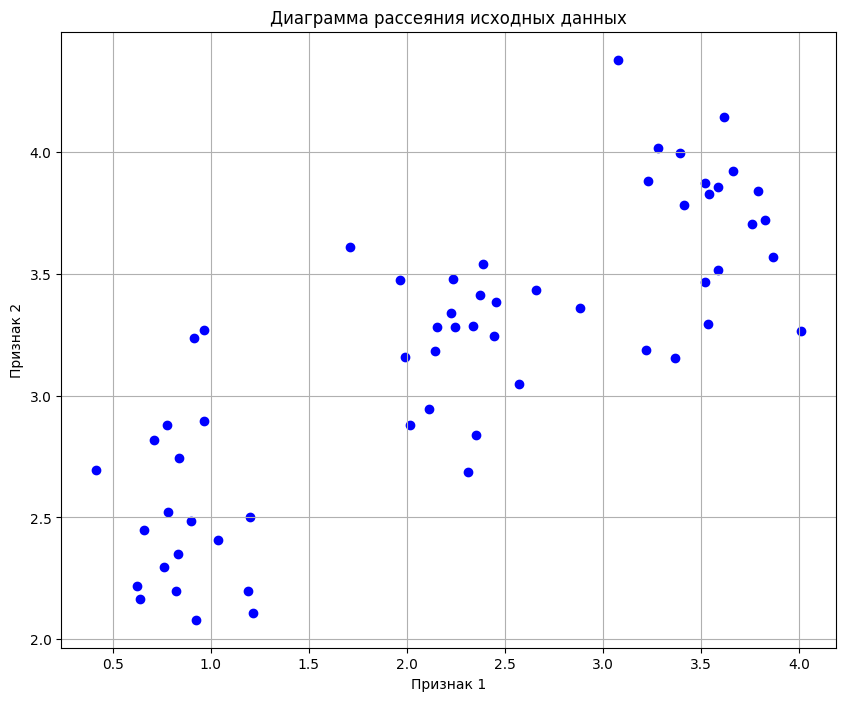

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = np.loadtxt('./ЛР_6/Data_Lab6/data2.txt')

plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c='blue')
plt.title('Диаграмма рассеяния исходных данных')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True)
plt.show()

In [18]:
m = 3              
k_max = 1000      
h = 0.1           

# Инициализация весов нейронов случайными значениями в диапазоне данных
min_vals = np.min(data, axis=0)
max_vals = np.max(data, axis=0)
W = min_vals + np.random.rand(m, 2) * (max_vals - min_vals)

# Алгоритм Кохонена
k = 0
prev_W = np.zeros_like(W)
convergence = False

while k < k_max and not convergence:
    # Сохраняем текущие веса для проверки условия остановки
    prev_W = W.copy()
    
    # Выбираем случайный объект из данных
    idx = np.random.randint(0, len(data))
    n_k = data[idx]
    
    # Вычисляем расстояния между вектором n_k и всеми нейронами
    distances = np.zeros(m)
    for j in range(m):
        distances[j] = np.sqrt(np.sum((n_k - W[j])**2))
    
    # Определяем нейрон с минимальным расстоянием
    winner = np.argmin(distances)
    
    # Корректируем весовой вектор победившего нейрона
    W[winner] += h * (n_k - W[winner])
    
    # Проверяем условие остановки: если веса не изменились существенно
    if np.allclose(W, prev_W, rtol=1e-5, atol=1e-5):
        convergence = True
        
    k += 1

print(f"Алгоритм завершился за {k} итераций")
print("Конечные положения нейронов:")
print(W)

Алгоритм завершился за 1000 итераций
Конечные положения нейронов:
[[0.93104931 2.60172669]
 [3.46393555 3.68251618]
 [2.18070864 3.38910427]]


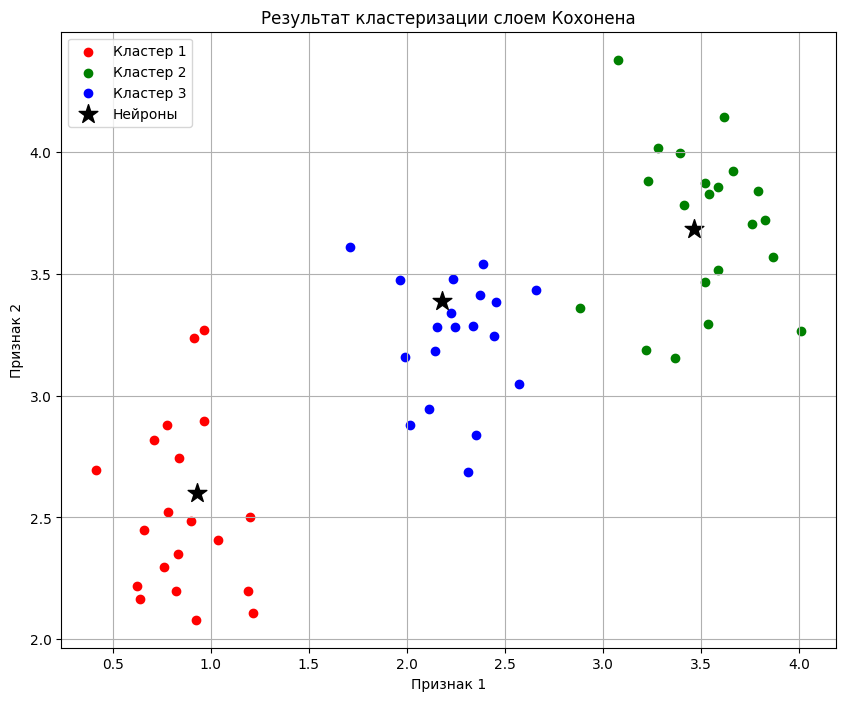

In [19]:
# Классификация объектов по принципу минимального расстояния до нейрона
clusters = np.zeros(len(data), dtype=int)
for i in range(len(data)):
    distances = np.zeros(m)
    for j in range(m):
        distances[j] = np.sqrt(np.sum((data[i] - W[j])**2))
    clusters[i] = np.argmin(distances)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i in range(m):
    # Отображаем точки для каждого кластера
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Кластер {i+1}')

# Отображаем нейроны (центры кластеров)
plt.scatter(W[:, 0], W[:, 1], c='black', marker='*', s=200, label='Нейроны')

plt.title('Результат кластеризации слоем Кохонена')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid(True)
plt.show()

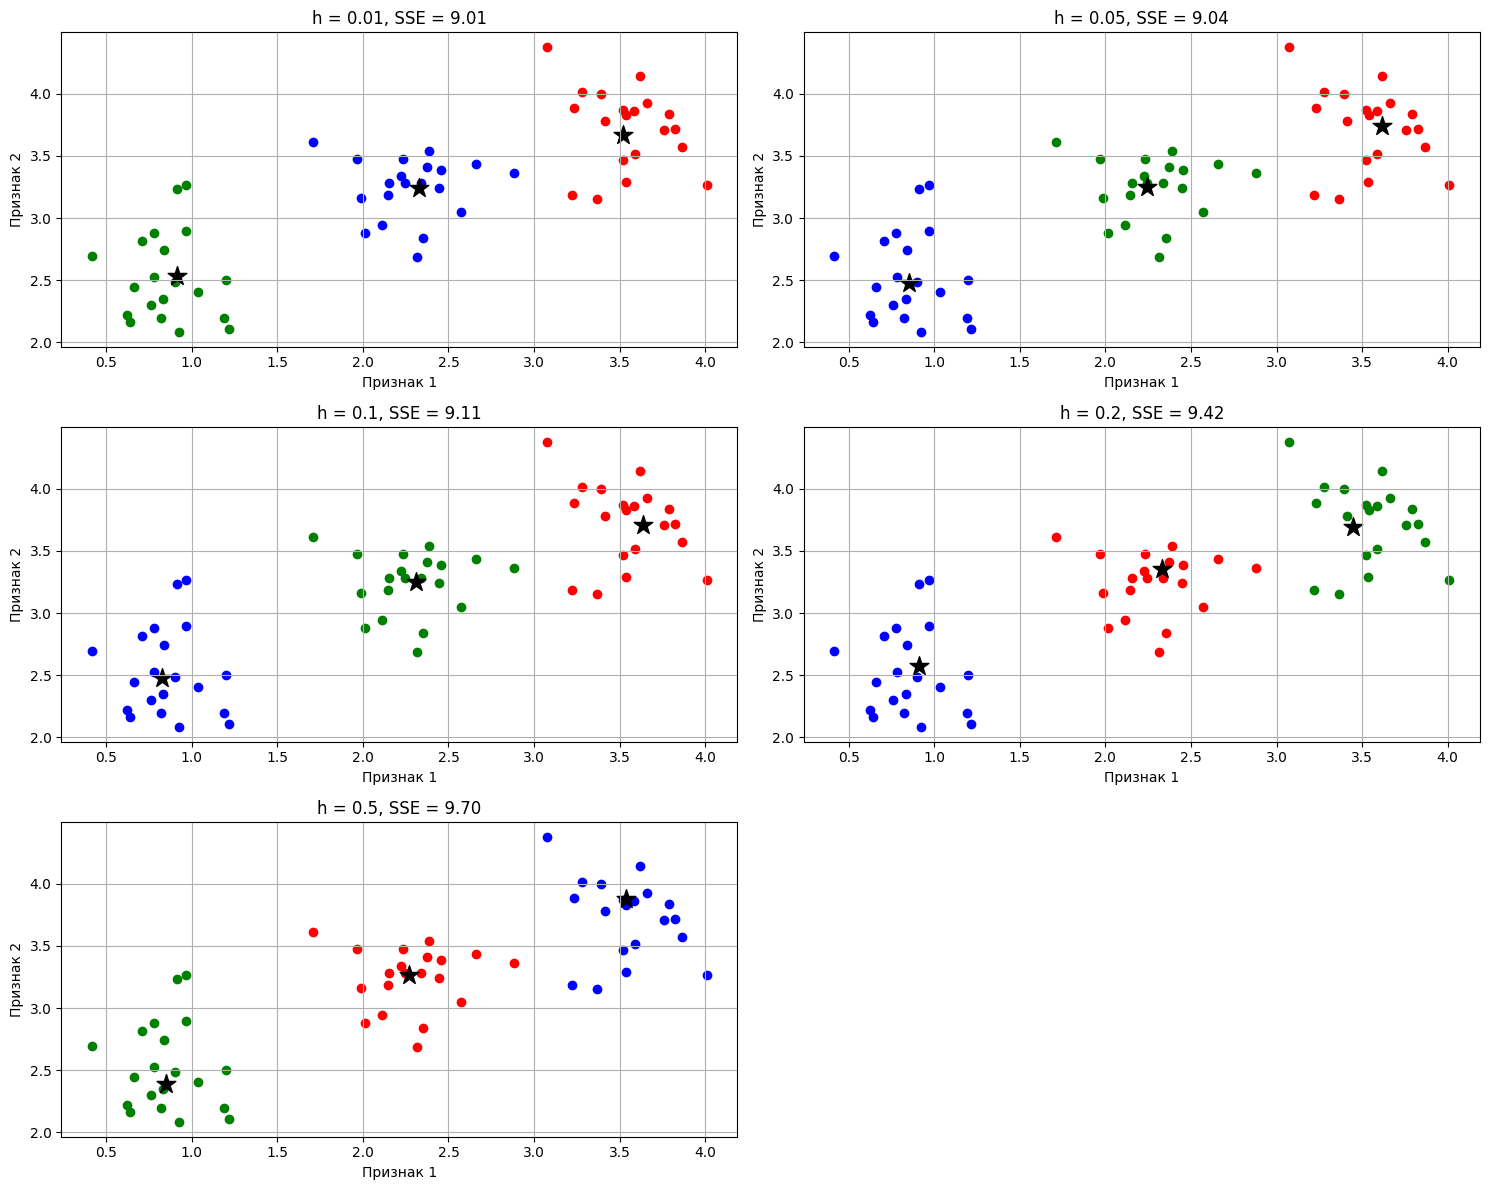

Оптимальный параметр обучения h = 0.01 с ошибкой SSE = 9.01


In [20]:
# Исследование влияния параметра h на качество кластеризации
h_values = [0.01, 0.05, 0.1, 0.2, 0.5]
results = []

plt.figure(figsize=(15, 12))

for idx, learning_rate in enumerate(h_values):
    # Инициализация весов
    W_test = min_vals + np.random.rand(m, 2) * (max_vals - min_vals)
    
    # Алгоритм Кохонена с текущим h
    k = 0
    prev_W = np.zeros_like(W_test)
    convergence = False
    
    while k < k_max and not convergence:
        prev_W = W_test.copy()
        
        # Выбираем случайный объект
        idx_point = np.random.randint(0, len(data))
        n_k = data[idx_point]
        
        # Вычисляем расстояния
        distances = np.zeros(m)
        for j in range(m):
            distances[j] = np.sqrt(np.sum((n_k - W_test[j])**2))
        
        # Определяем победителя
        winner = np.argmin(distances)
        
        # Корректируем веса
        W_test[winner] += learning_rate * (n_k - W_test[winner])
        
        # Проверка условия остановки
        if np.allclose(W_test, prev_W, rtol=1e-5, atol=1e-5):
            convergence = True
            
        k += 1
    
    # Классификация объектов
    test_clusters = np.zeros(len(data), dtype=int)
    for i in range(len(data)):
        distances = np.zeros(m)
        for j in range(m):
            distances[j] = np.sqrt(np.sum((data[i] - W_test[j])**2))
        test_clusters[i] = np.argmin(distances)
    
    # Оценка качества кластеризации: сумма квадратов расстояний
    sse = 0
    for i in range(len(data)):
        sse += np.sum((data[i] - W_test[test_clusters[i]])**2)
    
    results.append((learning_rate, sse, W_test.copy(), test_clusters.copy()))
    
    # Визуализация для текущего h
    plt.subplot(3, 2, idx+1)
    for i in range(m):
        cluster_points = data[test_clusters == i]
        if len(cluster_points) > 0:  # Проверка, что кластер не пуст
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Кластер {i+1}')
    
    plt.scatter(W_test[:, 0], W_test[:, 1], c='black', marker='*', s=200, label='Нейроны')
    plt.title(f'h = {learning_rate}, SSE = {sse:.2f}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Определение лучшего параметра h по минимальной ошибке
best_h_idx = np.argmin([res[1] for res in results])
best_h = results[best_h_idx][0]
best_sse = results[best_h_idx][1]

print(f"Оптимальный параметр обучения h = {best_h} с ошибкой SSE = {best_sse:.2f}")

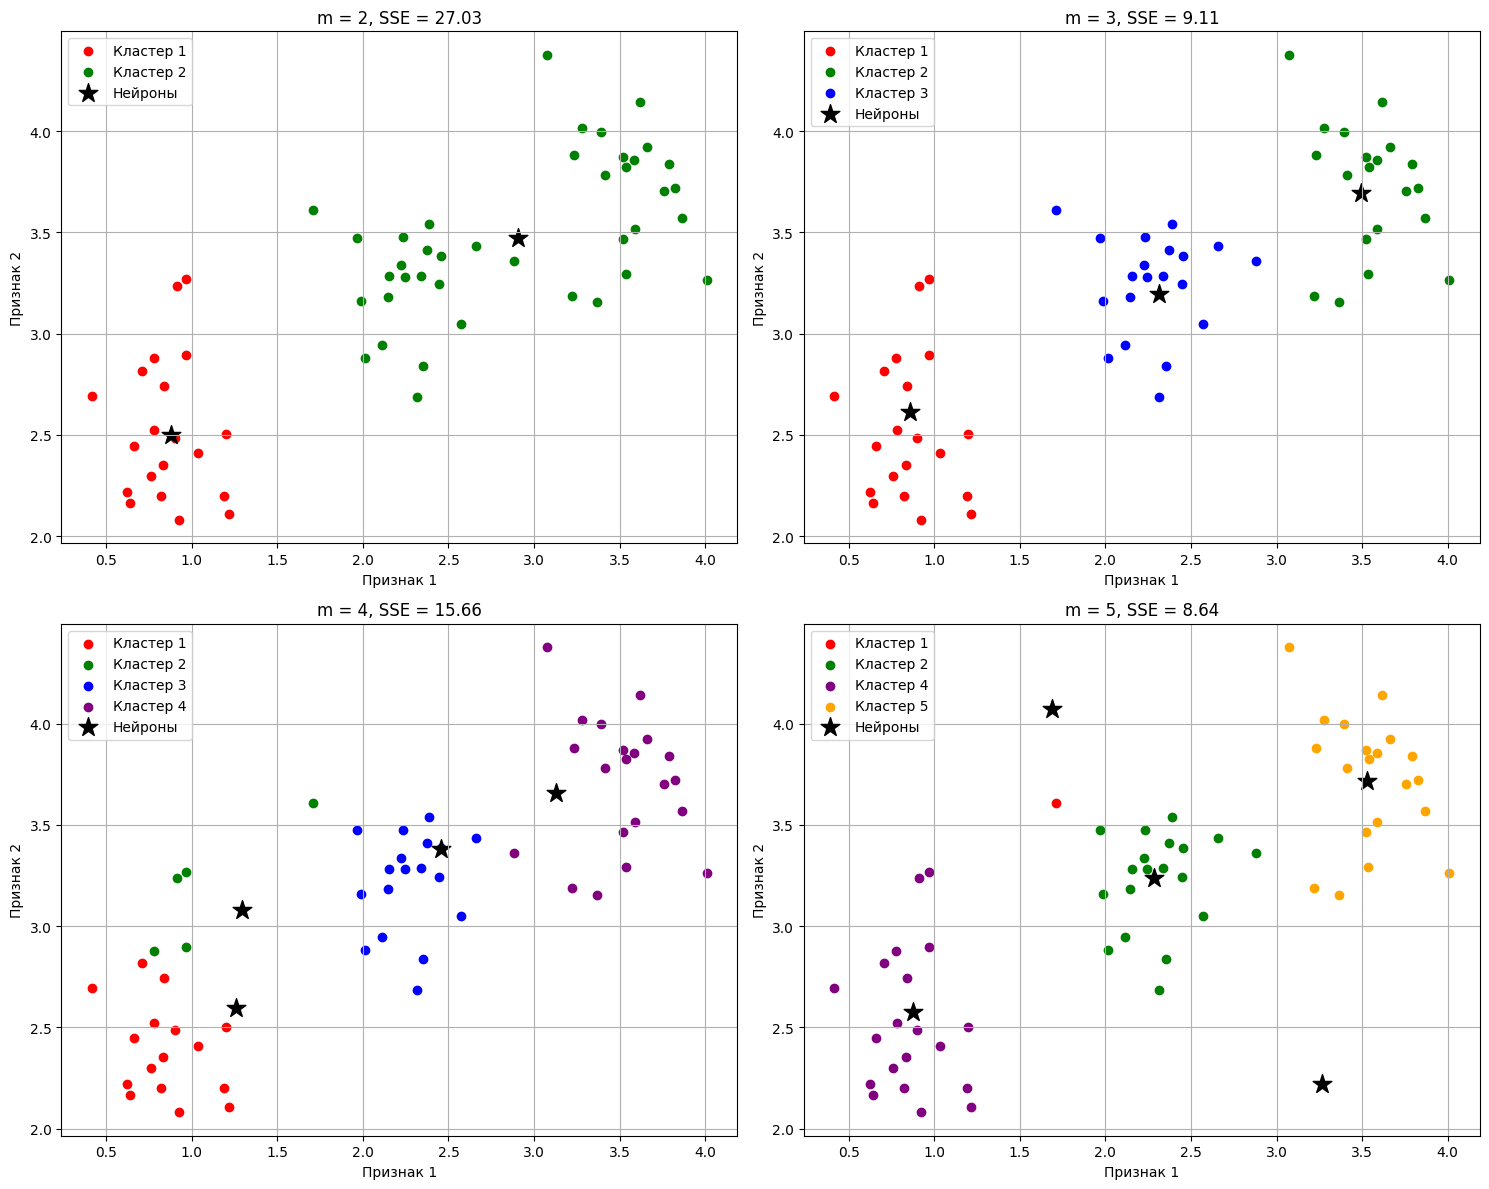

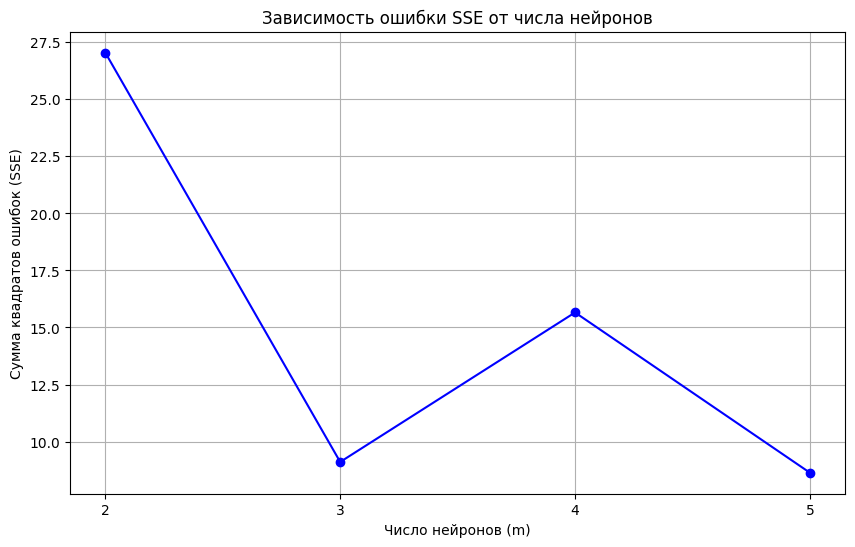

Оптимальное число нейронов m = 5 с ошибкой SSE = 8.64


In [21]:
# Определение оптимального числа нейронов m
m_values = [2, 3, 4, 5]
m_results = []

plt.figure(figsize=(15, 12))

for idx, m_test in enumerate(m_values):
    # Инициализация весов
    W_test = min_vals + np.random.rand(m_test, 2) * (max_vals - min_vals)
    
    # Используем лучший параметр h из предыдущего исследования
    h = best_h
    
    # Алгоритм Кохонена
    k = 0
    prev_W = np.zeros_like(W_test)
    convergence = False
    
    while k < k_max and not convergence:
        prev_W = W_test.copy()
        
        # Выбираем случайный объект
        idx_point = np.random.randint(0, len(data))
        n_k = data[idx_point]
        
        # Вычисляем расстояния
        distances = np.zeros(m_test)
        for j in range(m_test):
            distances[j] = np.sqrt(np.sum((n_k - W_test[j])**2))
        
        # Определяем победителя
        winner = np.argmin(distances)
        
        # Корректируем веса
        W_test[winner] += h * (n_k - W_test[winner])
        
        # Проверка условия остановки
        if np.allclose(W_test, prev_W, rtol=1e-5, atol=1e-5):
            convergence = True
            
        k += 1
    
    # Классификация объектов
    test_clusters = np.zeros(len(data), dtype=int)
    for i in range(len(data)):
        distances = np.zeros(m_test)
        for j in range(m_test):
            distances[j] = np.sqrt(np.sum((data[i] - W_test[j])**2))
        test_clusters[i] = np.argmin(distances)
    
    # Оценка качества кластеризации
    sse = 0
    for i in range(len(data)):
        sse += np.sum((data[i] - W_test[test_clusters[i]])**2)
    
    m_results.append((m_test, sse, W_test.copy(), test_clusters.copy()))
    
    # Визуализация для текущего m
    plt.subplot(2, 2, idx+1)
    for i in range(m_test):
        cluster_points = data[test_clusters == i]
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=colors[i % len(colors)], label=f'Кластер {i+1}')
    
    plt.scatter(W_test[:, 0], W_test[:, 1], c='black', marker='*', s=200, label='Нейроны')
    plt.title(f'm = {m_test}, SSE = {sse:.2f}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Визуализация зависимости ошибки от числа нейронов
plt.figure(figsize=(10, 6))
plt.plot([res[0] for res in m_results], [res[1] for res in m_results], 'bo-')
plt.title('Зависимость ошибки SSE от числа нейронов')
plt.xlabel('Число нейронов (m)')
plt.ylabel('Сумма квадратов ошибок (SSE)')
plt.xticks(m_values)
plt.grid(True)
plt.show()

# Определение оптимального числа нейронов
best_m_idx = np.argmin([res[1] for res in m_results])
best_m = m_results[best_m_idx][0]
best_m_sse = m_results[best_m_idx][1]
best_m_W = m_results[best_m_idx][2]
best_m_clusters = m_results[best_m_idx][3]

print(f"Оптимальное число нейронов m = {best_m} с ошибкой SSE = {best_m_sse:.2f}")

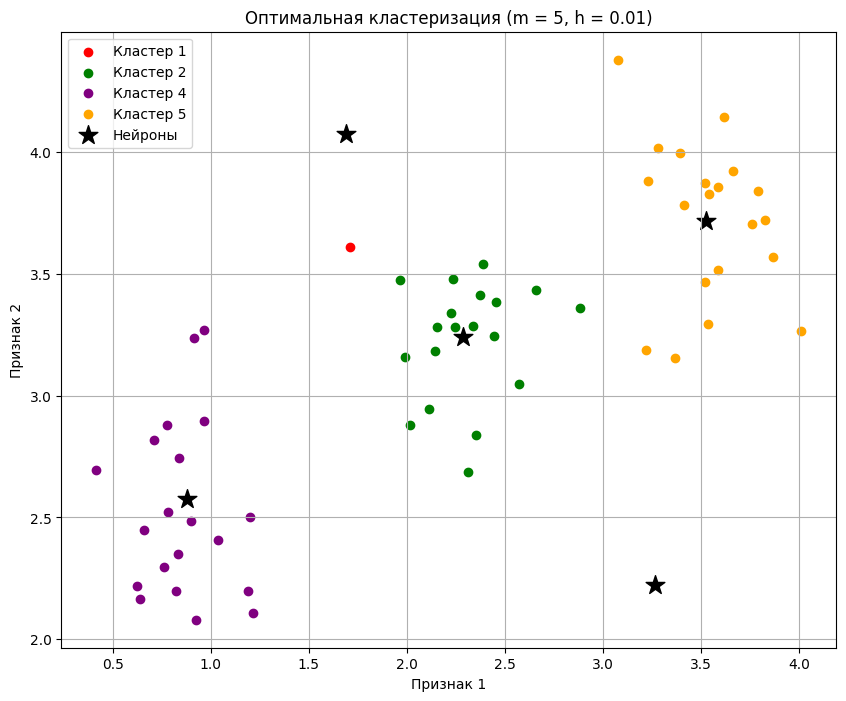

Результаты кластеризации:
Кластер 1: 1 объектов
Кластер 2: 19 объектов
Кластер 3: 0 объектов
Кластер 4: 20 объектов
Кластер 5: 20 объектов
Положение нейронов (центров кластеров):
Нейрон 1: [1.69029726 4.07145543]
Нейрон 2: [2.28372872 3.23972565]
Нейрон 3: [3.2641512 2.2209882]
Нейрон 4: [0.87798774 2.57579389]
Нейрон 5: [3.52656468 3.71765744]


In [22]:
# Визуализация результатов с оптимальными параметрами
plt.figure(figsize=(10, 8))
for i in range(best_m):
    cluster_points = data[best_m_clusters == i]
    if len(cluster_points) > 0:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                  c=colors[i % len(colors)], label=f'Кластер {i+1}')

plt.scatter(best_m_W[:, 0], best_m_W[:, 1], c='black', marker='*', s=200, label='Нейроны')
plt.title(f'Оптимальная кластеризация (m = {best_m}, h = {best_h})')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True)
plt.legend()
plt.show()

print("Результаты кластеризации:")
for i in range(best_m):
    cluster_size = np.sum(best_m_clusters == i)
    print(f"Кластер {i+1}: {cluster_size} объектов")
print(f"Положение нейронов (центров кластеров):")
for i in range(best_m):
    print(f"Нейрон {i+1}: {best_m_W[i]}")